In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_one = pd.read_csv(city_data_to_load)
ride_data_two = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_pyber_data = pd.merge(ride_data_two, city_data_one, on="city")
# Display the data table for preview
combined_pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

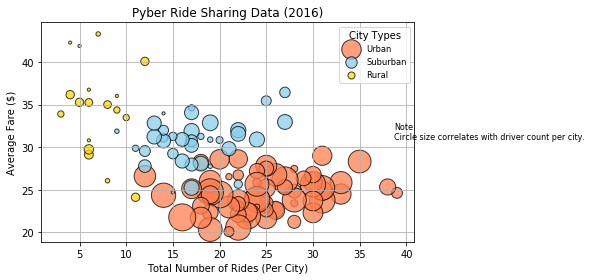

In [2]:
# Obtain the x and y coordinates for each of the three city types

#Urban
urban_cities = combined_pyber_data.loc[(combined_pyber_data["type"] == 'Urban')]
urban_mean = urban_cities.groupby(["city"])
avg_urban_fare = urban_mean.mean()
y_urban = avg_urban_fare["fare"]
x_urban = urban_cities["city"].value_counts()


#Suburban
sub_cities = combined_pyber_data.loc[(combined_pyber_data["type"] == 'Suburban')]
sub_mean = sub_cities.groupby(["city"])
avg_sub_fare = sub_mean.mean()
y_sub = avg_sub_fare["fare"]
x_sub = sub_cities["city"].value_counts()


#Rural
rural_cities = combined_pyber_data.loc[(combined_pyber_data["type"] == 'Rural')]
rural_mean = rural_cities.groupby(["city"])
avg_rural_fare = rural_mean.mean()
y_rural = avg_rural_fare["fare"]
x_rural = rural_cities["city"].value_counts()


#Driver per city for size
driver_urban = avg_urban_fare["driver_count"]
driver_sub = avg_sub_fare["driver_count"]
driver_rural = avg_rural_fare["driver_count"]
#driver = combined_pyber_data["driver_count"]

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s=driver_urban*10, marker="o", facecolor="coral", edgecolors="black", label="Urban", alpha=0.75, linewidth=1.0)
plt.scatter(x_sub, y_sub, s=driver_sub*10, marker="o", facecolor="skyblue", edgecolors="black", label="Suburban", alpha=0.75, linewidth=1.0)
plt.scatter(x_rural, y_rural, s=driver_rural*10, marker="o", facecolor="gold", edgecolors="black", label="Rural", alpha=0.75, linewidth=1.0)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)


# Create a legend
plt.legend(loc="best", fontsize="small", fancybox=True, title="City Types")

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.5,"Note:\nCircle size correlates with driver count per city.", wrap=True, fontsize=8)
# Save Figure
plt.tight_layout()
plt.savefig("pyber_ride_sharing.png")
plt.show()

In [133]:
# Show plot
plt.show()

## Total Fares by City Type

/Users/taylorgrafft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


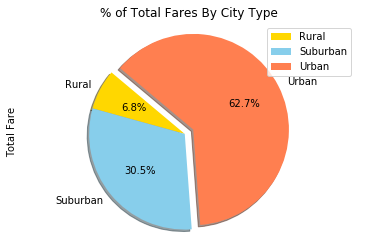

In [3]:
# Calculate Type Percents
grouped_cities = combined_pyber_data.groupby(["type"])
grouped_cities.head(10)
sum_fare = grouped_cities.sum()

# Build Pie Chart
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1) 
labels = ['Urban', 'Suburban', 'Rural']

total_fares = sum_fare[["fare"]]
total_fares['Total Fare'] = total_fares['fare']

total_fares.plot(kind='pie', y = 'Total Fare', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 

plt.axis("equal")
plt.title("% of Total Fares By City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("TotalFarePies.png")
plt.show()

In [163]:
# Show Figure
plt.show()

## Total Rides by City Type

/Users/taylorgrafft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


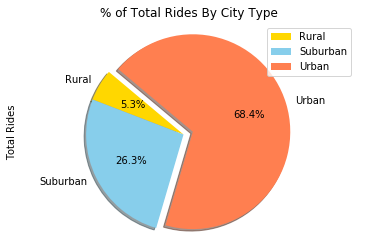

In [5]:
# Calculate Ride Percents
total_ride = grouped_cities.count()

# Build Pie Chart
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1) 
labels = ['Urban', 'Suburban', 'Rural']

total_rides = total_ride[["city"]]
total_rides['Total Rides'] = total_rides['city']

total_rides.plot(kind='pie', y = 'Total Rides', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 

plt.axis("equal")
plt.title("% of Total Rides By City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("TotalRidePies.png")
plt.show()

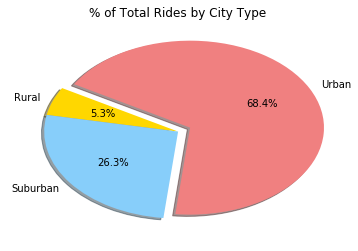

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

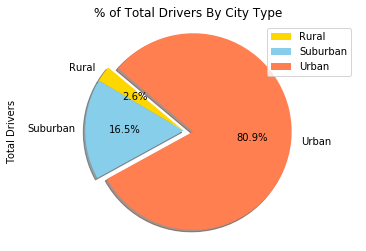

In [6]:
# Calculate Driver Percents
drive_group = city_data_one.groupby(["type"])
sum_drive = drive_group.sum()


# Build Pie Charts
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1) 
labels = ['Urban', 'Suburban', 'Rural']

total_drivers = sum_drive[["driver_count"]]
total_drivers['Total Drivers'] = total_drivers['driver_count']

total_drivers.plot(kind='pie', y = 'Total Drivers', explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 

plt.axis("equal")
plt.title("% of Total Drivers By City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("TotalDriversPies.png")
plt.show()

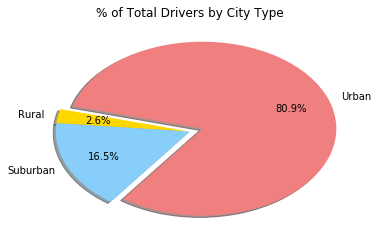

In [6]:
# Show Figure
plt.show()